In [6]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
!pwd
%cd /content/drive/MyDrive/LSTM\ project/LSTM

/content/drive/My Drive/LSTM project/LSTM
/content/drive/MyDrive/LSTM project/LSTM


In [8]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [10]:
# read 10 companies (2017/01/01~2020/12/31)
df1=pd.read_csv("AAPL_5.csv")
df2=pd.read_csv("MSFT_5.csv")
df3=pd.read_csv("TSLA_5.csv")
df4=pd.read_csv("NFLX_5.csv")
df5=pd.read_csv("CRM_5.csv")
df6=pd.read_csv("PG_5.csv")
df7=pd.read_csv("JNJ_5.csv")
df8=pd.read_csv("JPM_5.csv")
df9=pd.read_csv("DIS_5.csv")
df10=pd.read_csv("MMM_5.csv")
print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape, df9.shape, df10.shape)
df10.tail()

(1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
1001,2020-12-23,175.300003,175.809998,173.960007,173.990005,172.567963,1762600
1002,2020-12-24,174.419998,174.789993,173.419998,174.520004,173.093628,656200
1003,2020-12-28,175.309998,176.399994,174.389999,174.710007,173.282074,1403000
1004,2020-12-29,175.550003,175.639999,173.149994,173.850006,172.429108,1218900
1005,2020-12-30,173.880005,174.919998,173.380005,174.110001,172.686966,1419100


In [43]:
# extraxt training data
df1_tr=df1.iloc[:754, [2, 6]].values
df1_ts=df1.iloc[754:, [2, 6]].values

df2_tr=df2.iloc[:754, [2, 6]].values
df2_ts=df2.iloc[754:, [2, 6]].values

df3_tr=df3.iloc[:754, [2, 6]].values
df3_ts=df3.iloc[754:, [2, 6]].values

df4_tr=df4.iloc[:754, [2, 6]].values
df4_ts=df4.iloc[754:, [2, 6]].values

df5_tr=df5.iloc[:754, [2, 6]].values
df5_ts=df5.iloc[754:, [2, 6]].values

df6_tr=df6.iloc[:754, [2, 6]].values
df6_ts=df6.iloc[754:, [2, 6]].values

df7_tr=df7.iloc[:754, [2, 6]].values
df7_ts=df7.iloc[754:, [2, 6]].values

df8_tr=df8.iloc[:754, [2, 6]].values
df8_ts=df8.iloc[754:, [2, 6]].values

df9_tr=df9.iloc[:754, [2, 6]].values
df9_ts=df9.iloc[754:, [2, 6]].values

df10_tr=df10.iloc[:754, [2, 6]].values
df10_ts=df10.iloc[754:, [2, 6]].values

180.0

In [95]:
# combine 10 companies and 2 inputs('high', 'volume')
training_set_h=np.hstack((df1_tr[:,0].reshape(-1, 1), df2_tr[:,0].reshape(-1, 1), df3_tr[:,0].reshape(-1, 1), df4_tr[:,0].reshape(-1, 1), df5_tr[:,0].reshape(-1, 1), 
                          df6_tr[:,0].reshape(-1, 1), df7_tr[:,0].reshape(-1, 1), df8_tr[:,0].reshape(-1, 1), df9_tr[:,0].reshape(-1, 1), df10_tr[:,0].reshape(-1, 1)))
training_set_v=np.hstack((df1_tr[:,1].reshape(-1, 1), df2_tr[:,1].reshape(-1, 1), df3_tr[:,1].reshape(-1, 1), df4_tr[:,1].reshape(-1, 1), df5_tr[:,1].reshape(-1, 1),
                          df6_tr[:,1].reshape(-1, 1), df7_tr[:,1].reshape(-1, 1), df8_tr[:,1].reshape(-1, 1), df9_tr[:,1].reshape(-1, 1), df10_tr[:,1].reshape(-1, 1)))
print(training_set_h.shape, training_set_v.shape)
print(training_set_h[0])
print(training_set_v[0])
# feature scaling
ss=StandardScaler()
scaled_training_h=ss.fit_transform(training_set_h)
scaled_training_v=ss.fit_transform(training_set_v)
hstack = np.hstack((scaled_training_h, scaled_training_v))
print(hstack.shape)
print(hstack[0])
scaled_training=ss.fit_transform(hstack)

(754, 10) (754, 10)
[ 29.0825    62.84      44.066002 128.190002  70.860001  84.389999
 116.        87.760002 106.900002 180.      ]
[1.151276e+08 2.069410e+07 2.961650e+07 9.437900e+06 8.112200e+06
 8.792700e+06 5.953000e+06 2.055070e+07 8.884300e+06 2.509300e+06]
(754, 20)
[-1.95490948 -1.48961817 -1.82690914 -1.73232939 -1.93012342 -0.73943307
 -2.33767646 -1.5109427  -0.65043357 -0.8964646  -0.07429999 -0.50967687
 -0.47392773  0.15176427  0.96563033  0.1883599  -0.26213928  1.40735801
  0.0648856   0.09221081]
[-1.95490948 -1.48961817 -1.82690914 -1.73232939 -1.93012342 -0.73943307
 -2.33767646 -1.5109427  -0.65043357 -0.8964646  -0.07429999 -0.50967687
 -0.47392773  0.15176427  0.96563033  0.1883599  -0.26213928  1.40735801
  0.0648856   0.09221081]


In [93]:
# Creating a data structure with 60 time-steps
X_train=[]

aapl_h, aapl_v=[],[]
msft_h, msft_v=[],[]
tsla_h, tsla_v=[],[]
nflx_h, nflx_v=[],[]
crm_h, crm_v=[],[]
pg_h, pg_v=[],[]
jnj_h, jnj_v=[],[]
jpm_h, jpm_v=[],[]
dis_h, dis_v=[],[]
mmm_h, mmm_v=[],[]


for i in range(60, 754): 
  X_train.append(scaled_training[i-60: i, :])
  aapl_h.append(scaled_training[i,0])
  msft_h.append(scaled_training[i,1])
  tsla_h.append(scaled_training[i,2])
  nflx_h.append(scaled_training[i,3])
  crm_h.append(scaled_training[i,4])
  pg_h.append(scaled_training[i,5])
  jnj_h.append(scaled_training[i,6])
  jpm_h.append(scaled_training[i,7])
  dis_h.append(scaled_training[i,8])
  mmm_h.append(scaled_training[i,8])
  aapl_v.append(scaled_training[i,10])
  msft_v.append(scaled_training[i,11])
  tsla_v.append(scaled_training[i,12])
  nflx_v.append(scaled_training[i,13])
  crm_v.append(scaled_training[i,14])
  pg_v.append(scaled_training[i,15])
  jnj_v.append(scaled_training[i,16])
  jpm_v.append(scaled_training[i,17])
  dis_v.append(scaled_training[i,18])
  mmm_v.append(scaled_training[i,19])

X_train=np.array(X_train)
aapl_h, aapl_v= np.array(aapl_h), np.array(aapl_v)
msft_h, msft_v=np.array(msft_h), np.array(msft_v)
tsla_h, tsla_v=np.array(tsla_h), np.array(tsla_v)
nflx_h, nflx_v=np.array(nflx_h), np.array(nflx_v)
crm_h, crm_v=np.array(crm_h), np.array(crm_v)
pg_h, pg_v=np.array(pg_h), np.array(pg_v)
jnj_h, jnj_v=np.array(jnj_h), np.array(jnj_v)
jpm_h, jpm_v=np.array(jpm_h), np.array(jpm_v)
dis_h, dis_v=np.array(dis_h), np.array(dis_v)
mmm_h, mmm_v=np.array(mmm_h), np.array(mmm_v)

print(X_train.shape, aapl_h.shape)
print(aapl_h[0], aapl_v[0])

(694, 60, 20) (694,)
-1.1424482041900357 -0.6702946951340243


In [80]:
model_list = []
y_train = [aapl_h, aapl_v, msft_h, msft_v, tsla_h, tsla_v, nflx_h, nflx_v, crm_h, crm_v,
           pg_h, pg_v, jnj_h, jnj_v, jpm_h, jpm_v, dis_h, dis_v, mmm_h, mmm_v]
for i in range(X_train.shape[2]):
  print(f"{i+1}/{X_train.shape[2]}")
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  # ここのinput_shapeで入力次元を設定する
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2] )))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))

  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  model.fit(X_train, y_train[i], epochs = 10, batch_size = 32)
  model_list.append(model)
  print("")

1/20
Epoch 1/10
22/22 [==============================] - 8s 109ms/step - loss: 0.4244
Epoch 2/10
22/22 [==============================] - 2s 110ms/step - loss: 0.0570
Epoch 3/10
22/22 [==============================] - 2s 111ms/step - loss: 0.0324
Epoch 4/10
22/22 [==============================] - 3s 113ms/step - loss: 0.0309
Epoch 5/10
22/22 [==============================] - 2s 111ms/step - loss: 0.0286
Epoch 6/10
22/22 [==============================] - 2s 111ms/step - loss: 0.0246
Epoch 7/10
22/22 [==============================] - 2s 111ms/step - loss: 0.0351
Epoch 8/10
22/22 [==============================] - 2s 113ms/step - loss: 0.0260
Epoch 9/10
22/22 [==============================] - 2s 112ms/step - loss: 0.0222
Epoch 10/10
22/22 [==============================] - 2s 111ms/step - loss: 0.0233

2/20
Epoch 1/10
22/22 [==============================] - 8s 115ms/step - loss: 0.9104
Epoch 2/10
22/22 [==============================] - 2s 112ms/step - loss: 0.7599
Epoch 3/10
22/22

In [ ]:
# Getting the predicted stock price 
_df1_tr=df1.iloc[:754, [2, 6]]
_df1_ts=df1.iloc[754:, [2, 6]]

_df2_tr=df2.iloc[:754, [2, 6]]
_df2_ts=df2.iloc[754:, [2, 6]]

_df3_tr=df3.iloc[:754, [2, 6]]
_df3_ts=df3.iloc[754:, [2, 6]]

_df4_tr=df4.iloc[:754, [2, 6]]
_df4_ts=df4.iloc[754:, [2, 6]]

_df5_tr=df5.iloc[:754, [2, 6]]
_df5_ts=df5.iloc[754:, [2, 6]]

_df6_tr=df6.iloc[:754, [2, 6]]
_df6_ts=df6.iloc[754:, [2, 6]]

_df7_tr=df7.iloc[:754, [2, 6]]
_df7_ts=df7.iloc[754:, [2, 6]]

_df8_tr=df8.iloc[:754, [2, 6]]
_df8_ts=df8.iloc[754:, [2, 6]]

_df9_tr=df9.iloc[:754, [2, 6]]
_df9_ts=df9.iloc[754:, [2, 6]]

_df10_tr=df10.iloc[:754, [2, 6]]
_df10_ts=df10.iloc[754:, [2, 6]]

dataset_total_a = pd.concat((_df1_tr, _df1_ts), axis = 0) 
dataset_total_ms = pd.concat((_df2_tr, _df2_ts), axis = 0) 
dataset_total_t = pd.concat((_df3_tr, _df3_ts), axis = 0) 
dataset_total_n = pd.concat((_df4_tr, _df4_ts), axis = 0) 
dataset_total_c = pd.concat((_df5_tr, _df5_ts), axis = 0) 
dataset_total_p = pd.concat((_df6_tr, _df6_ts), axis = 0) 
dataset_total_jn = pd.concat((_df7_tr, _df7_ts), axis = 0) 
dataset_total_jp = pd.concat((_df8_tr, _df8_ts), axis = 0) 
dataset_total_d = pd.concat((_df9_tr, _df9_ts), axis = 0) 
dataset_total_mm = pd.concat((_df10_tr, _df10_ts), axis = 0) 

# ここで、test用にのデータを改めて作成している
inputs_a = dataset_total_a[len(dataset_total_a) - len(_df1_ts) - 60:].values
inputs_ms = dataset_total_ms[len(dataset_total_ms) - len(_df2_ts) - 60:].values
inputs_t = dataset_total_t[len(dataset_total_t) - len(_df3_ts) - 60:].values
inputs_n = dataset_total_n[len(dataset_total_n) - len(_df4_ts) - 60:].values
inputs_c = dataset_total_c[len(dataset_total_c) - len(_df5_ts) - 60:].values
inputs_p = dataset_total_p[len(dataset_total_p) - len(_df6_ts) - 60:].values
inputs_jn = dataset_total_jn[len(dataset_total_jn) - len(_df7_ts) - 60:].values
inputs_jp = dataset_total_jp[len(dataset_total_jp) - len(_df8_ts) - 60:].values
inputs_d = dataset_total_d[len(dataset_total_d) - len(_df9_ts) - 60:].values
inputs_mm = dataset_total_mm[len(dataset_total_mm) - len(_df10_ts) - 60:].values

print(f"inputs_a= {inputs_a[0, 0]}, {inputs_a[0,1]}")

# StandardScalerを使うときは、１次元データを必ず(xx, )->(xx, 1)に変換する必要がある
ss_lists = [inputs_a[:,0].reshape(-1,1), inputs_a[:,1].reshape(-1,1),inputs_ms[:,0].reshape(-1,1),inputs_ms[:,1].reshape(-1,1),
            inputs_t[:,0].reshape(-1,1),inputs_t[:,1].reshape(-1,1), inputs_n[:,0].reshape(-1,1),inputs_n[:,1].reshape(-1,1),
            inputs_c[:,0].reshape(-1,1),inputs_c[:,1].reshape(-1,1),inputs_p[:,0].reshape(-1,1),inputs_p[:,1].reshape(-1,1),
            inputs_jn[:,0].reshape(-1,1),inputs_jn[:,1].reshape(-1,1),inputs_jp[:,0].reshape(-1,1),inputs_jp[:,1].reshape(-1,1),
            inputs_d[:,0].reshape(-1,1),inputs_d[:,1].reshape(-1,1),inputs_mm[:,0].reshape(-1,1),inputs_mm[:,1].reshape(-1,1)]

x = []
ss = []
for i in range(len(ss_lists)):
 s = StandardScaler() 
 m = s.fit_transform(ss_lists[i])
 x.append(m)
 ss.append(s)

# X_testの実験用に全てをcombineしている
inputs2=np.hstack((x[0], x[1], x[2], x[3],x[4], x[5],x[6], x[7],x[8], x[9],
                   x[10], x[11], x[12], x[13],x[14], x[15],x[16], x[17],x[18], x[19]))
print(f"inputs2 = {inputs2.shape}")

X_test = []
# for j in range(inputs.shape[1]):
# testデータも全ての5要素をinputとして使う
for j in range(60, 312):
  X_test.append(inputs2[j-60:j, :])

X_test = np.array(X_test)
print(X_test.shape)
print(X_test[0])

print(f"_df1_ts = {_df1_ts['High']}")

In [106]:
"""y_train = [aapl_h, aapl_v, msft_h, msft_v, tsla_h, tsla_v, nflx_h, nflx_v, crm_h, crm_v,
           pg_h, pg_v, jnj_h, jnj_v, jpm_h, jpm_v, dis_h, dis_v, mmm_h, mmm_v]"""
preds = []
for i in range(20):
  preds.append(np.array(model_list[i].predict(X_test)))
for j in range(20):
  preds[j] = ss[j].inverse_transform(preds[j])
print(preds[0].shape)
print(preds[0][0], preds[1][0]) #1つ目がhigh price, 2つ目がvolumeの予測値

(252, 1)
[77.31661] [1.3353206e+08]


R2[Apple(H)]=0.14222414478521472


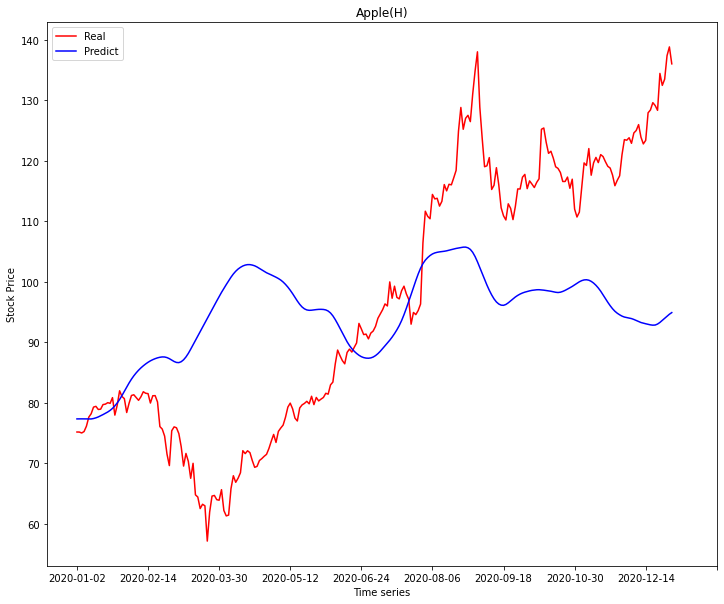

R2[Apple(V)]=-0.21287078987419905


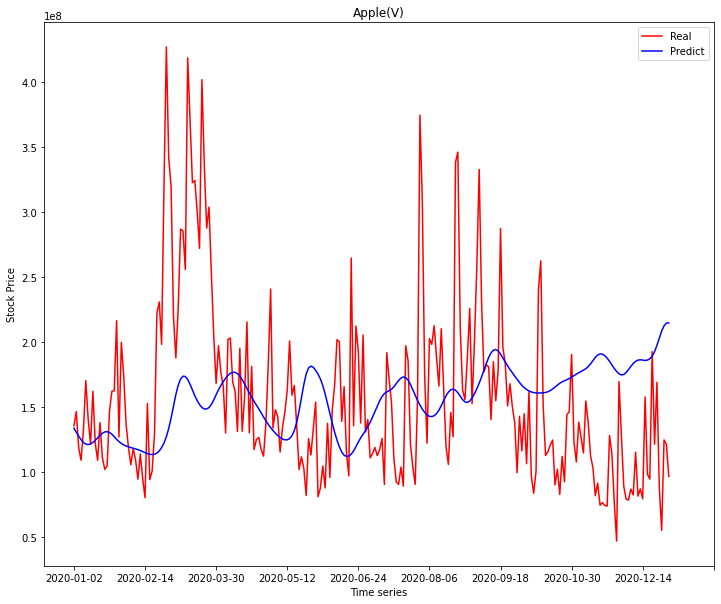

R2[Microsoft(H)]=-0.1224775452028748


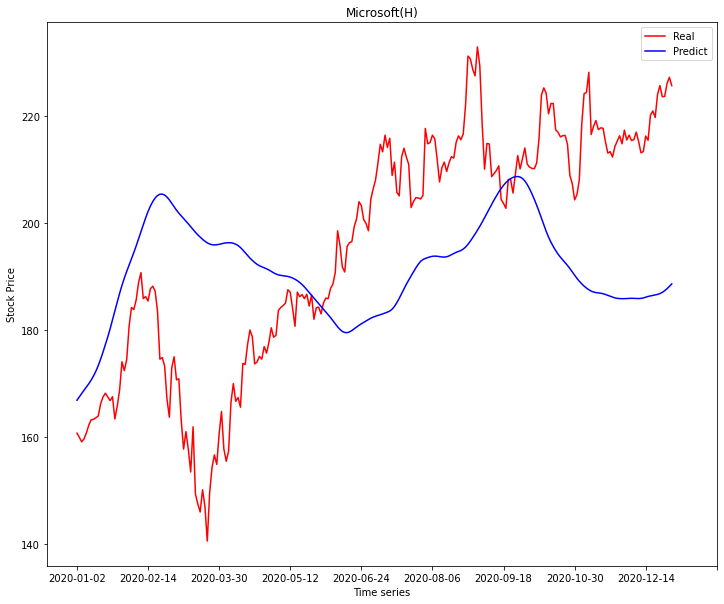

R2[Microsoft(V)]=-0.158861297503593


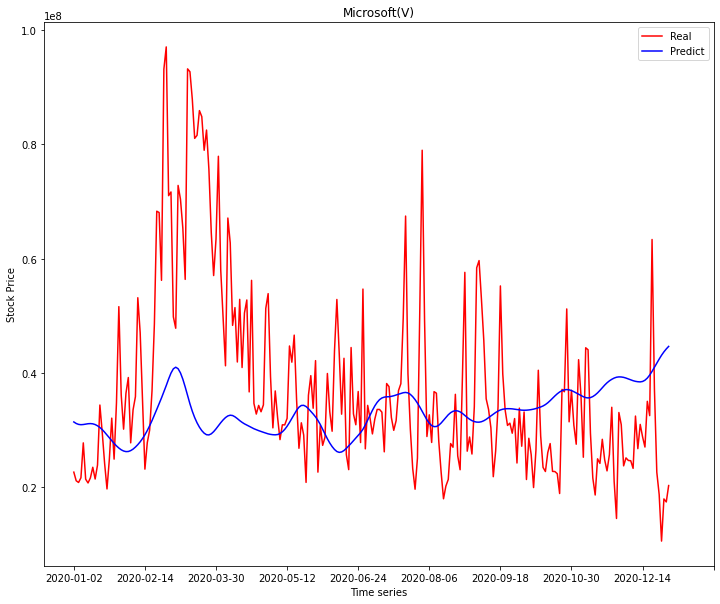

R2[Tesla(H)]=-0.2385610019385973


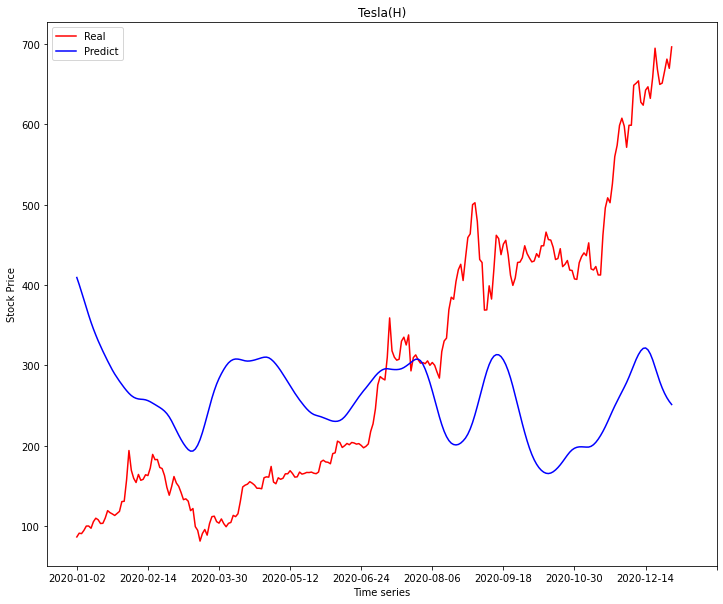

R2[Tesla(V)]=-0.1489932896316546


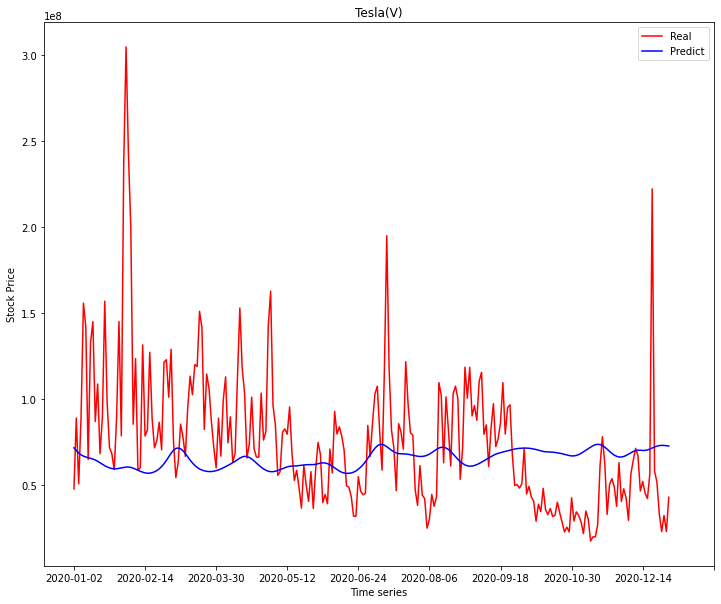

R2[Netflix(H)]=0.11201810713704319


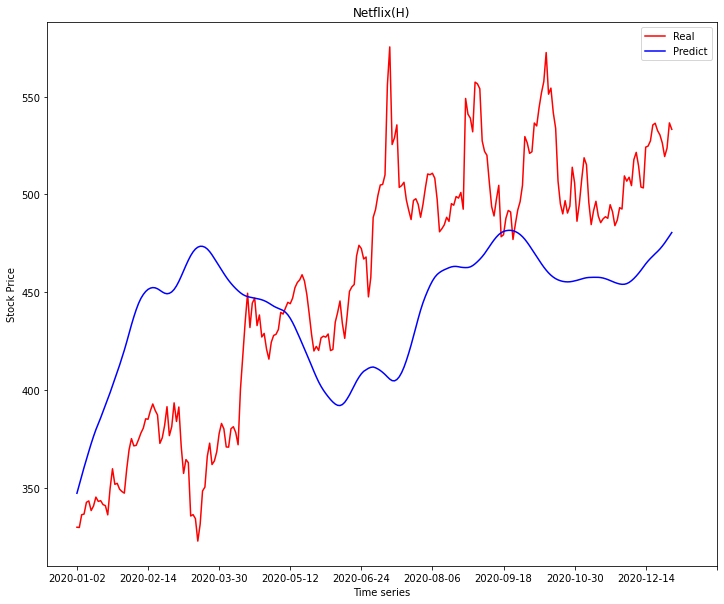

R2[Netflix(V)]=-0.3681283532407704


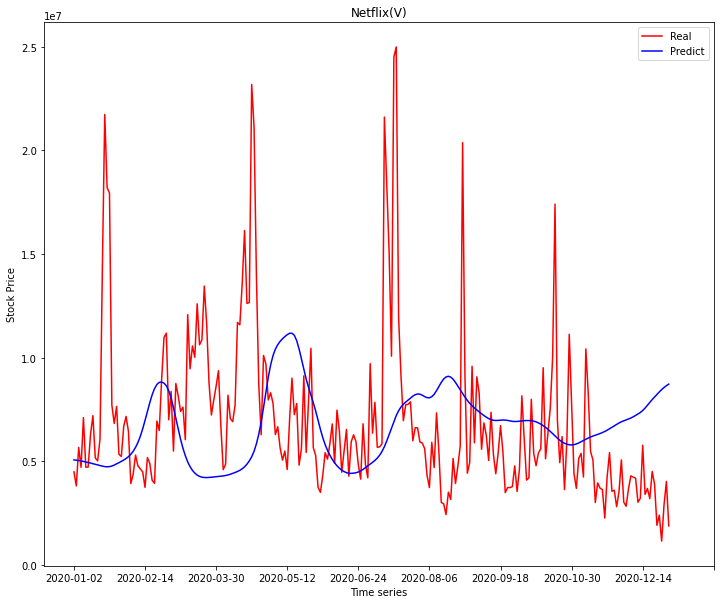

R2[Salesforce(H)]=0.43516918361465917


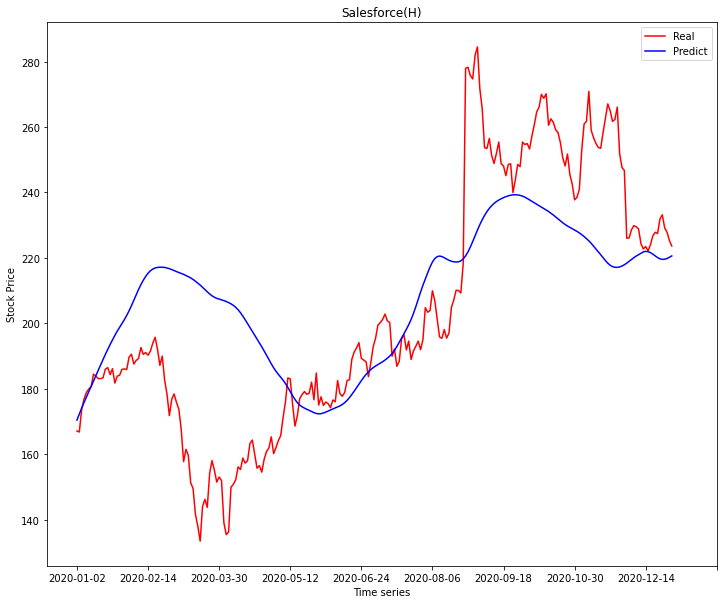

R2[Salesforce(V)]=-0.40226716055451917


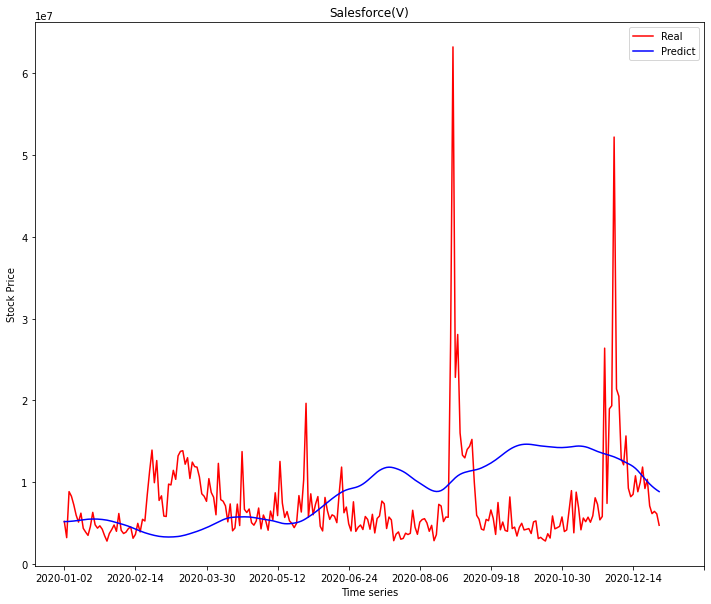

R2[P&G(H)]=0.05485018643832262


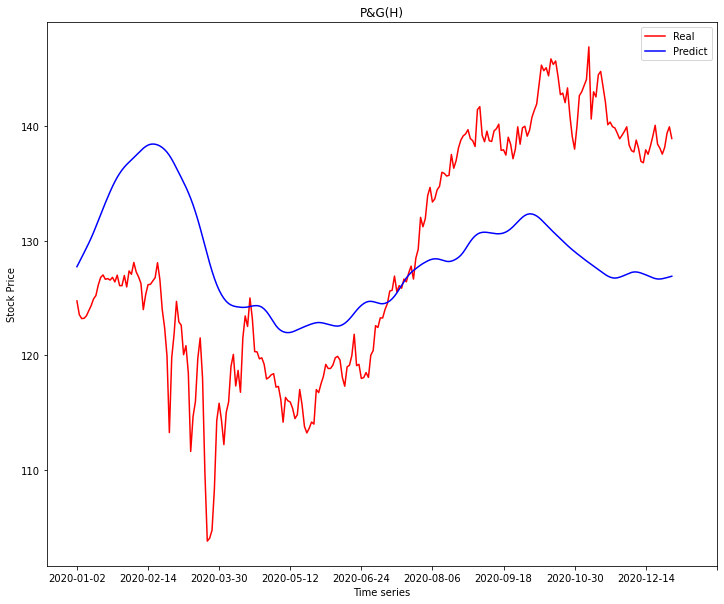

R2[P&G(V)]=0.13631098358657745


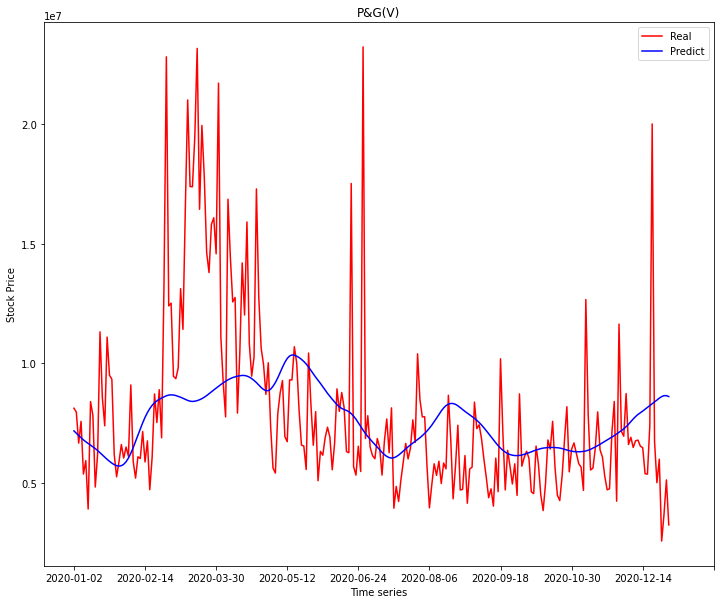

R2[J & J(H)]=-0.5560965189080294


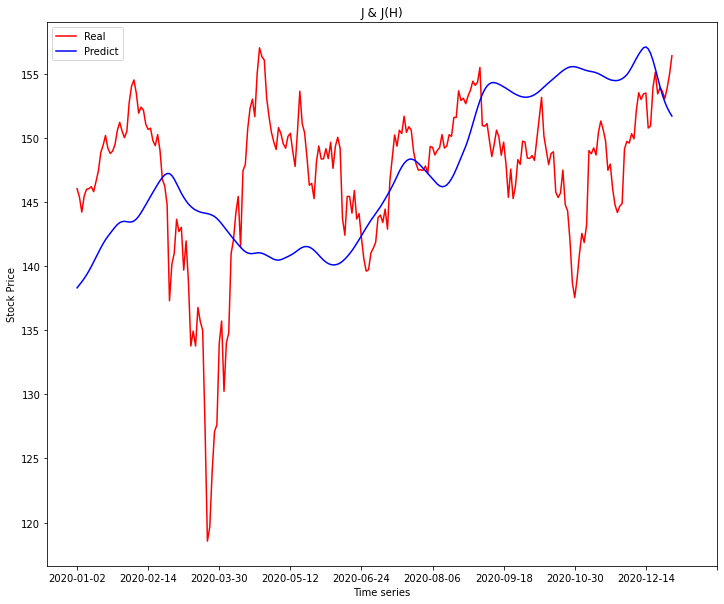

R2[J & J(V)]=-0.022871276255225226


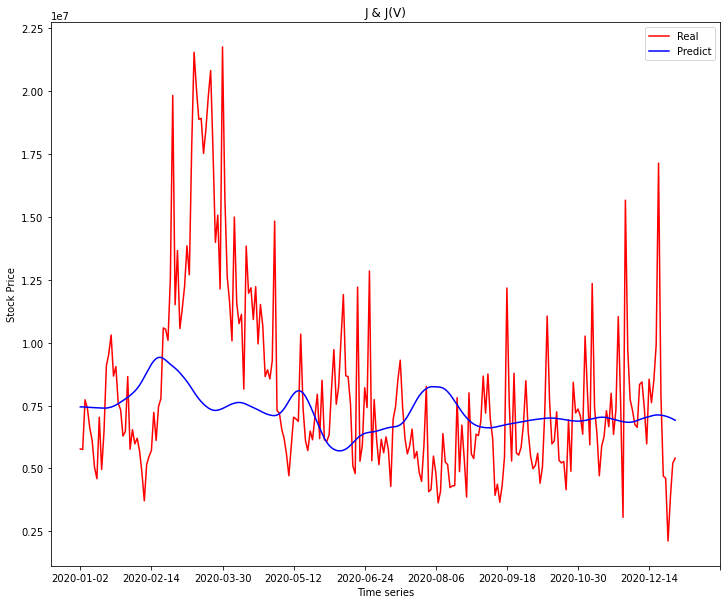

R2[JPM(H)]=-0.19328697117829785


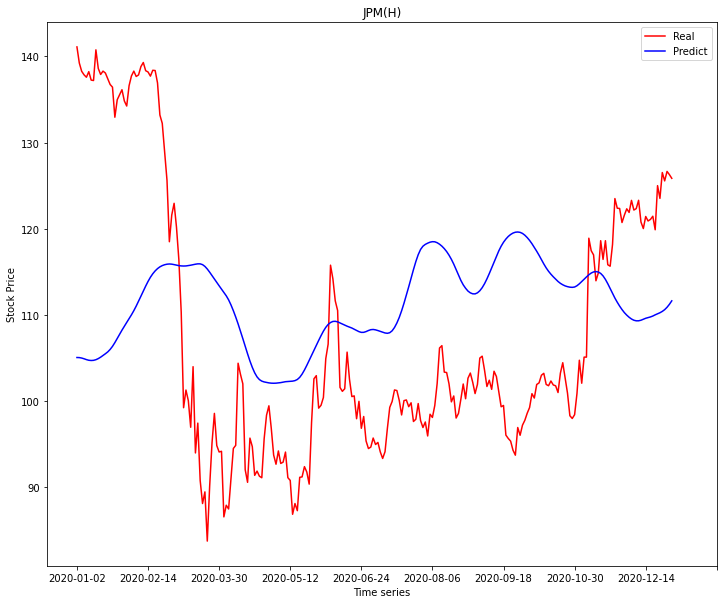

R2[JPM(V)]=-0.7635246661720492


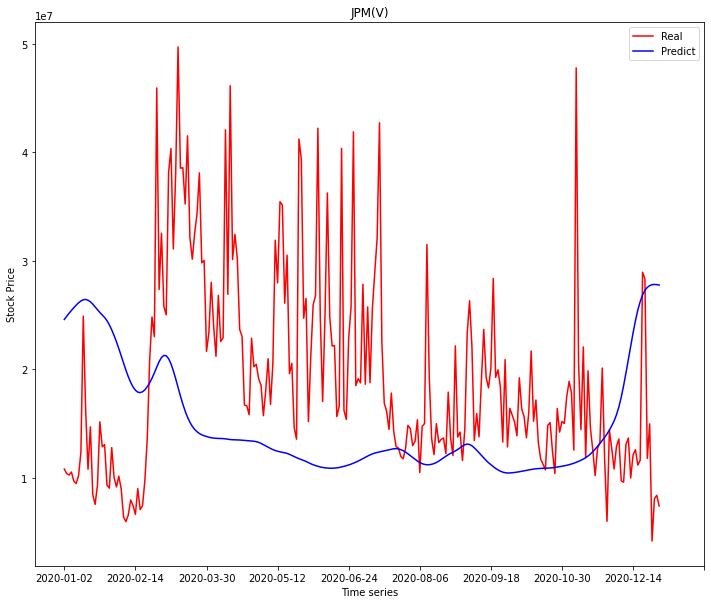

R2[Disney(H)]=0.026259654345447747


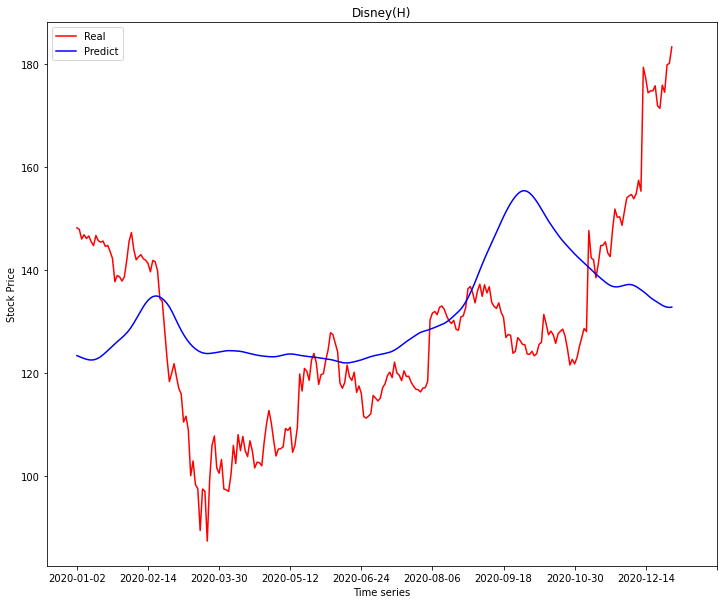

R2[Disney(V)]=0.055449335812613465


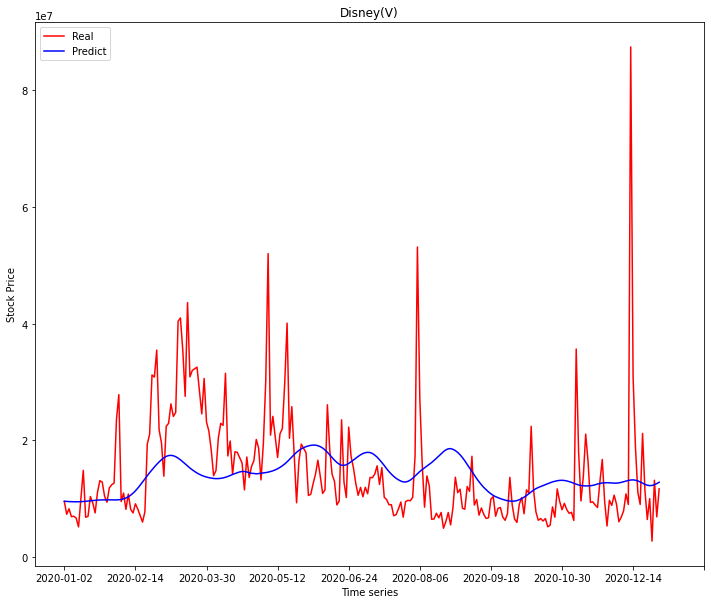

R2[MMM(H)]=0.1430885130588212


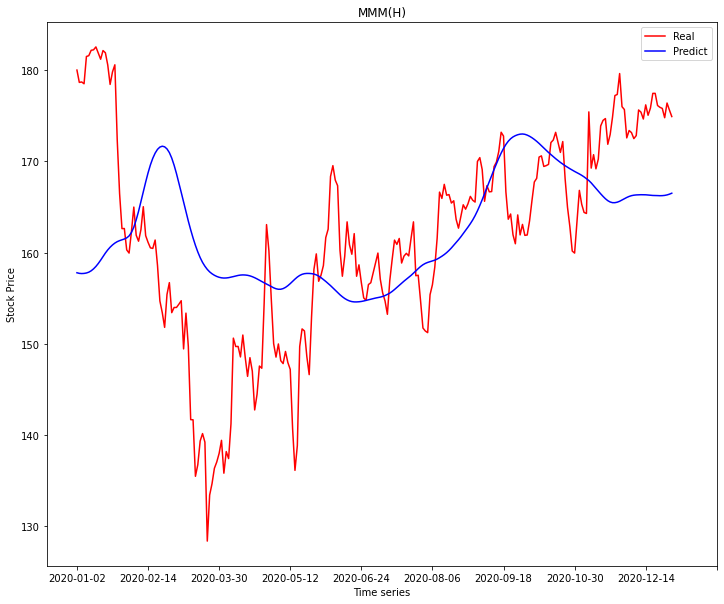

R2[MMM(V)]=-0.06150387438981553


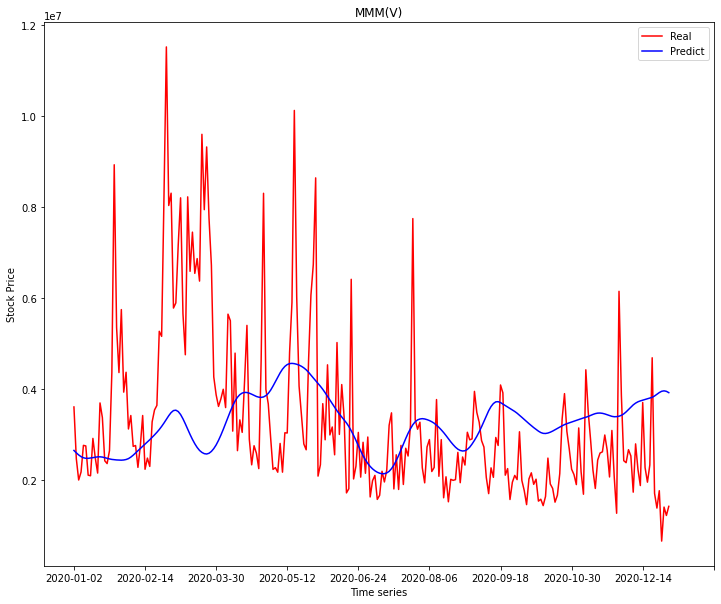

In [132]:
# Visualising the results
preds_list= preds
actual_list=[_df1_ts['High'], _df1_ts['Volume'], _df2_ts['High'], _df2_ts['Volume'], _df3_ts['High'], _df3_ts['Volume'], _df4_ts['High'], _df4_ts['Volume'], _df5_ts['High'], _df5_ts['Volume'],
             _df6_ts['High'], _df6_ts['Volume'],_df7_ts['High'], _df7_ts['Volume'],_df8_ts['High'], _df8_ts['Volume'],_df9_ts['High'], _df9_ts['Volume'],_df10_ts['High'], _df10_ts['Volume']]


title=["Apple(H)", "Apple(V)", "Microsoft(H)", "Microsoft(V)", "Tesla(H)", "Tesla(V)", "Netflix(H)", "Netflix(V)", "Salesforce(H)", "Salesforce(V)",
       "P&G(H)", "P&G(V)", "J & J(H)", "J & J(V)", "JPM(H)", "JPM(V)", "Disney(H)", "Disney(V)", "MMM(H)", "MMM(V)"]      

R2 = ["Apple(H)", "Apple(V)", "Microsoft(H)", "Microsoft(V)", "Tesla(H)", "Tesla(V)", "Netflix(H)", "Netflix(V)", "Salesforce(H)", "Salesforce(V)",
       "P&G(H)", "P&G(V)", "J & J(H)", "J & J(V)", "JPM(H)", "JPM(V)", "Disney(H)", "Disney(V)", "MMM(H)", "MMM(V)"]

for i in range(len(title)):
  plt.figure(figsize=(12, 10)) #754
  plt.plot(df1.loc[754:,'Date'], actual_list[i], color='red', label='Real')
  plt.plot(df1.loc[754:,'Date'], preds_list[i], color='blue', label='Predict')

  from sklearn.metrics import r2_score

  plt.xticks(np.arange(0, 300, 30))
  plt.title(title[i])
  plt.xlabel('Time series')
  plt.ylabel('Stock Price')

  print(f"R2[{R2[i]}]={r2_score(actual_list[i], preds_list[i].flatten())}")
  plt.legend()
  plt.show()

"""　Because there are more variables like 20 here, it is likely to get general predictions.
 In the short term, it is less accurate, but in the long term, it may be better suited in terms of forecasting sectors and markets as a whole."""